In [123]:
# Import Libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

# Classification models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict

# Clustering models
from sklearn.cluster import KMeans

# Evaluation metrics
from sklearn.metrics import (
    adjusted_rand_score,
    normalized_mutual_info_score,
    silhouette_score,
    confusion_matrix,
    classification_report
)

In [2]:
# Loading the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Preprocess the Data
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
# Flatten the image data
x_train_flattened = x_train.reshape(len(x_train), -1)
x_test_flattened = x_test.reshape(len(x_test), -1)

In [5]:
# Combine flattened features with target labels
train_data = np.column_stack((x_train_flattened, y_train))
test_data = np.column_stack((x_test_flattened, y_test))

In [6]:
# Convert to DataFrame
train_df = pd.DataFrame(train_data, columns=[f'pixel_{i}' for i in range(x_train_flattened.shape[1])] + ['target'])
test_df = pd.DataFrame(test_data, columns=[f'pixel_{i}' for i in range(x_test_flattened.shape[1])] + ['target'])

In [7]:
# Store to CSV
train_df.to_csv('train_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)

In [8]:
# Loading Training Data
X = pd.read_csv('train_data.csv')

In [9]:
X['target'].unique()

array([5., 0., 4., 1., 9., 2., 3., 6., 7., 8.])

In [10]:
# Loading Testing Data
y = pd.read_csv('test_data.csv')

In [11]:
# Spliting training the data to features and label
X_train = X.iloc[:, :-1]
y_train = X.iloc[:, -1]

In [12]:
# Spliting testing the data to features and label
X_test = y.iloc[:,:-1]
y_test = y.iloc[:,-1]

*Supervised Learning*

*KNN*

In [13]:
# Implementing KNN
knn = KNeighborsClassifier()

In [14]:
# Training the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [74]:
# Predicting the test data
knn_pred = knn.predict(X_test)

In [75]:
# Conrfusion matrix
print(confusion_matrix(y_test,knn_pred))

[[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  11    8  991    2    1    0    1   15    3    0]
 [   0    3    3  976    1   13    1    6    3    4]
 [   3    7    0    0  944    0    4    2    1   21]
 [   5    0    0   12    2  862    4    1    2    4]
 [   5    3    0    0    3    2  945    0    0    0]
 [   0   22    4    0    3    0    0  988    0   11]
 [   8    3    5   13    6   12    5    5  913    4]
 [   5    7    3    9    7    3    1   10    2  962]]


In [76]:
# Classification Report
knn_report=classification_report(y_test,knn_pred)
print(knn_report)

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98       980
         1.0       0.95      1.00      0.98      1135
         2.0       0.98      0.96      0.97      1032
         3.0       0.96      0.97      0.97      1010
         4.0       0.98      0.96      0.97       982
         5.0       0.97      0.97      0.97       892
         6.0       0.98      0.99      0.98       958
         7.0       0.96      0.96      0.96      1028
         8.0       0.99      0.94      0.96       974
         9.0       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



*SVM*

In [18]:
# Implementing SVM
svm = SVC()

In [19]:
# Training the model
svm.fit(X_train,y_train)

SVC()

In [77]:
# Predicting the test data
svm_pred = svm.predict(X_test)

In [78]:
# Confusion matrix
print(confusion_matrix(y_test,svm_pred))

[[ 973    0    1    0    0    2    1    1    2    0]
 [   0 1126    3    1    0    1    1    1    2    0]
 [   6    1 1006    2    1    0    2    7    6    1]
 [   0    0    2  995    0    2    0    5    5    1]
 [   0    0    5    0  961    0    3    0    2   11]
 [   2    0    0    9    0  871    4    1    4    1]
 [   6    2    0    0    2    3  944    0    1    0]
 [   0    6   11    1    1    0    0  996    2   11]
 [   3    0    2    6    3    2    2    3  950    3]
 [   3    4    1    7   10    2    1    7    4  970]]


In [79]:
# Classification Report
svm_report = classification_report(y_test,svm_pred)
print(svm_report)

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       980
         1.0       0.99      0.99      0.99      1135
         2.0       0.98      0.97      0.98      1032
         3.0       0.97      0.99      0.98      1010
         4.0       0.98      0.98      0.98       982
         5.0       0.99      0.98      0.98       892
         6.0       0.99      0.99      0.99       958
         7.0       0.98      0.97      0.97      1028
         8.0       0.97      0.98      0.97       974
         9.0       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



*Decision Tree*

In [23]:
# Implementing Decision Tree
dt = DecisionTreeClassifier(criterion='entropy')

In [24]:
# Training the model
dt.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [80]:
# Predicting the test data
dt_pred = dt.predict(X_test)

In [81]:
# Confusion matrix
print(confusion_matrix(y_test,dt_pred))

[[ 916    2    7    5    2   18   11    3    5   11]
 [   1 1099    6    6    0    7    1    1   13    1]
 [  10    4  913   19   15   13   12   19   23    4]
 [   7    9   26  855    5   51    3   12   28   14]
 [   9    3   13    7  855    5   17   12   17   44]
 [  12    5    6   36    4  756   23    3   25   22]
 [  12    5   10    3   25   19  864    4   14    2]
 [   2   10   30   17   11    5    3  923    7   20]
 [   6    6   26   36   14   16   16    6  824   24]
 [   6    9   13   14   32   23    4   19   20  869]]


In [82]:
# Classification Report
dt_report = classification_report(y_test,dt_pred)
print(dt_report)

              precision    recall  f1-score   support

         0.0       0.93      0.93      0.93       980
         1.0       0.95      0.97      0.96      1135
         2.0       0.87      0.88      0.88      1032
         3.0       0.86      0.85      0.85      1010
         4.0       0.89      0.87      0.88       982
         5.0       0.83      0.85      0.84       892
         6.0       0.91      0.90      0.90       958
         7.0       0.92      0.90      0.91      1028
         8.0       0.84      0.85      0.85       974
         9.0       0.86      0.86      0.86      1009

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



Unsupervised Learning

*K Means Clustering*

In [28]:
# Implementing K Means Clustering
kmeans = KMeans(n_clusters=10)

In [29]:
# Training the model
kmeans.fit(X_train)

C:\Users\saich\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10)

In [30]:
# Predict cluster labels for training and test data
train_cluster_labels = kmeans.predict(X_train)
test_cluster_labels = kmeans.predict(X_test)

In [31]:
# To evaluate clustering, we can map cluster labels to the most frequent true label in each cluster
# Here, we'll define a function to map cluster labels to the most frequent true label
def map_cluster_labels(cluster_labels, true_labels):
    cluster_to_label = {}
    for cluster in set(cluster_labels):
        idx = cluster_labels == cluster
        label = true_labels[idx].mode()[0]  # Most frequent label in the cluster
        cluster_to_label[cluster] = label
    mapped_labels = [cluster_to_label[cluster] for cluster in cluster_labels]
    return mapped_labels

In [83]:
# Map cluster labels to the most frequent true labels
y_train_kmeans_mapped = map_cluster_labels(train_cluster_labels, y_train)
y_test_kmeans_mapped = map_cluster_labels(test_cluster_labels, y_test)

In [84]:
# Evaluate clustering performance for Training Data
ari_train = adjusted_rand_score(y_train, y_train_kmeans_mapped)
nmi_train = normalized_mutual_info_score(y_train, y_train_kmeans_mapped)
silhouette_train = silhouette_score(X_train, y_train_kmeans_mapped)

In [85]:
# Evaluate clustering performance for Testing Data
ari_test = adjusted_rand_score(y_test, y_test_kmeans_mapped)
nmi_test = normalized_mutual_info_score(y_test, y_test_kmeans_mapped)
silhouette_test = silhouette_score(X_test, y_test_kmeans_mapped)

In [86]:
# Store evaluation metrics in a DataFrame
metrics_df = pd.DataFrame({
    "Metric": ["ARI", "NMI", "Silhouette Score"],
    "Training": [ari_train, nmi_train, silhouette_train],
    "Test": [ari_test, nmi_test, silhouette_test]
})

In [87]:
metrics_df

,Metric,Training,Test
0,ARI,0.333955,0.338789
1,NMI,0.439741,0.446160
2,Silhouette Score,0.055787,0.059337


In [88]:
# Confusion matrix
print(confusion_matrix(y_test,y_test_kmeans_mapped))

[[ 567    2   60  144    2   77  124    4    0    0]
 [   0 1098    3    3    1   27    3    0    0    0]
 [   9  131  627  126   20   13   91   15    0    0]
 [   1   95  169  654   19   25   13   34    0    0]
 [   9   64   10    0  604  124   19  152    0    0]
 [   6   69   36  307   42  389   18   25    0    0]
 [  41   49  116    7   12   18  714    1    0    0]
 [   1   89    4    1  244   20    0  669    0    0]
 [   8  154   15  376   72  302   13   34    0    0]
 [   5   35    9   12  582   19    0  347    0    0]]


In [89]:
# Classification Report
kmc_report=classification_report(y_test, y_test_kmeans_mapped)
print(kmc_report)

              precision    recall  f1-score   support

         0.0       0.88      0.58      0.70       980
         1.0       0.61      0.97      0.75      1135
         2.0       0.60      0.61      0.60      1032
         3.0       0.40      0.65      0.50      1010
         4.0       0.38      0.62      0.47       982
         5.0       0.38      0.44      0.41       892
         6.0       0.72      0.75      0.73       958
         7.0       0.52      0.65      0.58      1028
         8.0       0.00      0.00      0.00       974
         9.0       0.00      0.00      0.00      1009

    accuracy                           0.53     10000
   macro avg       0.45      0.52      0.47     10000
weighted avg       0.45      0.53      0.48     10000



C:\Users\saich\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saich\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saich\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: Unde

In [90]:
wcss = []
for i in range(1, 16):
    kmc = KMeans(n_clusters=i, random_state=0)
    kmc.fit(X)
    wcss.append(kmc.inertia_)

C:\Users\saich\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\saich\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\saich\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\s

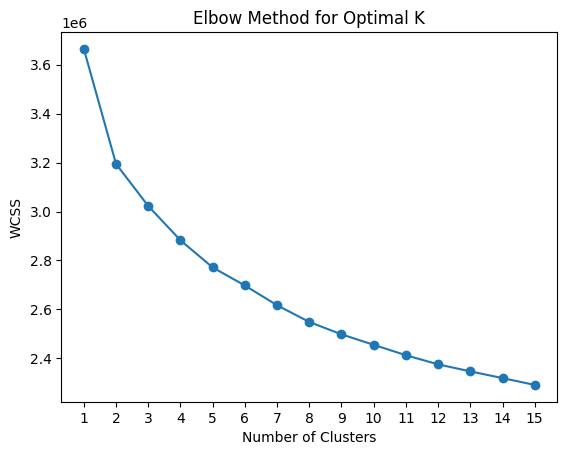

In [91]:
plt.plot(range(1, 16), wcss, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 16))
plt.show()

*PCA*

In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [93]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [94]:
n_components = 100

In [95]:
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)

In [96]:
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)

*K Means With PCA*

In [97]:
kmeans_pca = KMeans(n_clusters=10)  # Number of clusters = number of classes in MNIST
kmeans_pca.fit(X_train_pca)

C:\Users\saich\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10)

In [98]:
# Predict cluster labels for training and test data
train_cluster_labels = kmeans_pca.predict(X_train_pca)
test_cluster_labels = kmeans_pca.predict(X_test_pca)

In [99]:
# Map cluster labels to the most frequent true labels
y_train_kmeans_mapped_p = map_cluster_labels(train_cluster_labels, y_train)
y_test_kmeans_mapped_p = map_cluster_labels(test_cluster_labels, y_test)

In [100]:
# Evaluate clustering performance for Training Data
ari_train = adjusted_rand_score(y_train, y_train_kmeans_mapped_p)
nmi_train = normalized_mutual_info_score(y_train, y_train_kmeans_mapped_p)
silhouette_train = silhouette_score(X_train, y_train_kmeans_mapped_p)

In [101]:
# Evaluate clustering performance for Testing Data
ari_test = adjusted_rand_score(y_test, y_test_kmeans_mapped_p)
nmi_test = normalized_mutual_info_score(y_test, y_test_kmeans_mapped_p)
silhouette_test = silhouette_score(X_test, y_test_kmeans_mapped_p)

In [102]:
# Store evaluation metrics in a DataFrame
metrics_df = pd.DataFrame({
    "Metric": ["ARI", "NMI", "Silhouette Score"],
    "Training": [ari_train, nmi_train, silhouette_train],
    "Test": [ari_test, nmi_test, silhouette_test]
})

In [103]:
metrics_df

,Metric,Training,Test
0,ARI,0.333087,0.337817
1,NMI,0.438969,0.445373
2,Silhouette Score,0.055894,0.059473


In [104]:
# Confusion matrix
print(confusion_matrix(y_test, y_test_kmeans_mapped_p))

[[ 564    2   67  145    2   71  125    4    0    0]
 [   0 1098    3    3    1   27    3    0    0    0]
 [   9  132  626  125   18   12   95   15    0    0]
 [   1   94  171  656   19   22   13   34    0    0]
 [   9   67   10    0  598  125   19  154    0    0]
 [   6   68   37  314   42  382   18   25    0    0]
 [  41   49  116    7   11   19  714    1    0    0]
 [   1   89    4    1  241   22    0  670    0    0]
 [   8  156   14  378   66  302   13   37    0    0]
 [   6   34    9   14  577   19    0  350    0    0]]


In [105]:
# Classification Report
kmcPCA_report=classification_report(y_test, y_test_kmeans_mapped)
print(kmcPCA_report)

              precision    recall  f1-score   support

         0.0       0.88      0.58      0.70       980
         1.0       0.61      0.97      0.75      1135
         2.0       0.60      0.61      0.60      1032
         3.0       0.40      0.65      0.50      1010
         4.0       0.38      0.62      0.47       982
         5.0       0.38      0.44      0.41       892
         6.0       0.72      0.75      0.73       958
         7.0       0.52      0.65      0.58      1028
         8.0       0.00      0.00      0.00       974
         9.0       0.00      0.00      0.00      1009

    accuracy                           0.53     10000
   macro avg       0.45      0.52      0.47     10000
weighted avg       0.45      0.53      0.48     10000



C:\Users\saich\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saich\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\saich\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\metrics\_classification.py:1344: Unde

*Analysis*

In [107]:
models = {
    "SVM": svm,
    "KNN": knn,
    "Decision Tree": dt,
    "KMeans": kmeans,
    "KMeans with PCA": kmeans_pca
}

In [108]:
accuracy = {}
precision = {}
recall = {}
f1 = {}

In [118]:
# Calculate metrics
for name, model in models.items():
    y_pred = cross_val_predict(model, X_test, y_test, cv=5)  # Using cross-validation for more robust results
    accuracy[name] = accuracy_score(y_test, y_pred)
    precision[name] = precision_score(y_test, y_pred, average='weighted')
    recall[name] = recall_score(y_test, y_pred, average='weighted')
    f1[name] = f1_score(y_test, y_pred, average='weighted')

C:\Users\saich\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\saich\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\saich\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\s

C:\Users\saich\AppData\Local\Temp\ipykernel_10752\1109262832.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


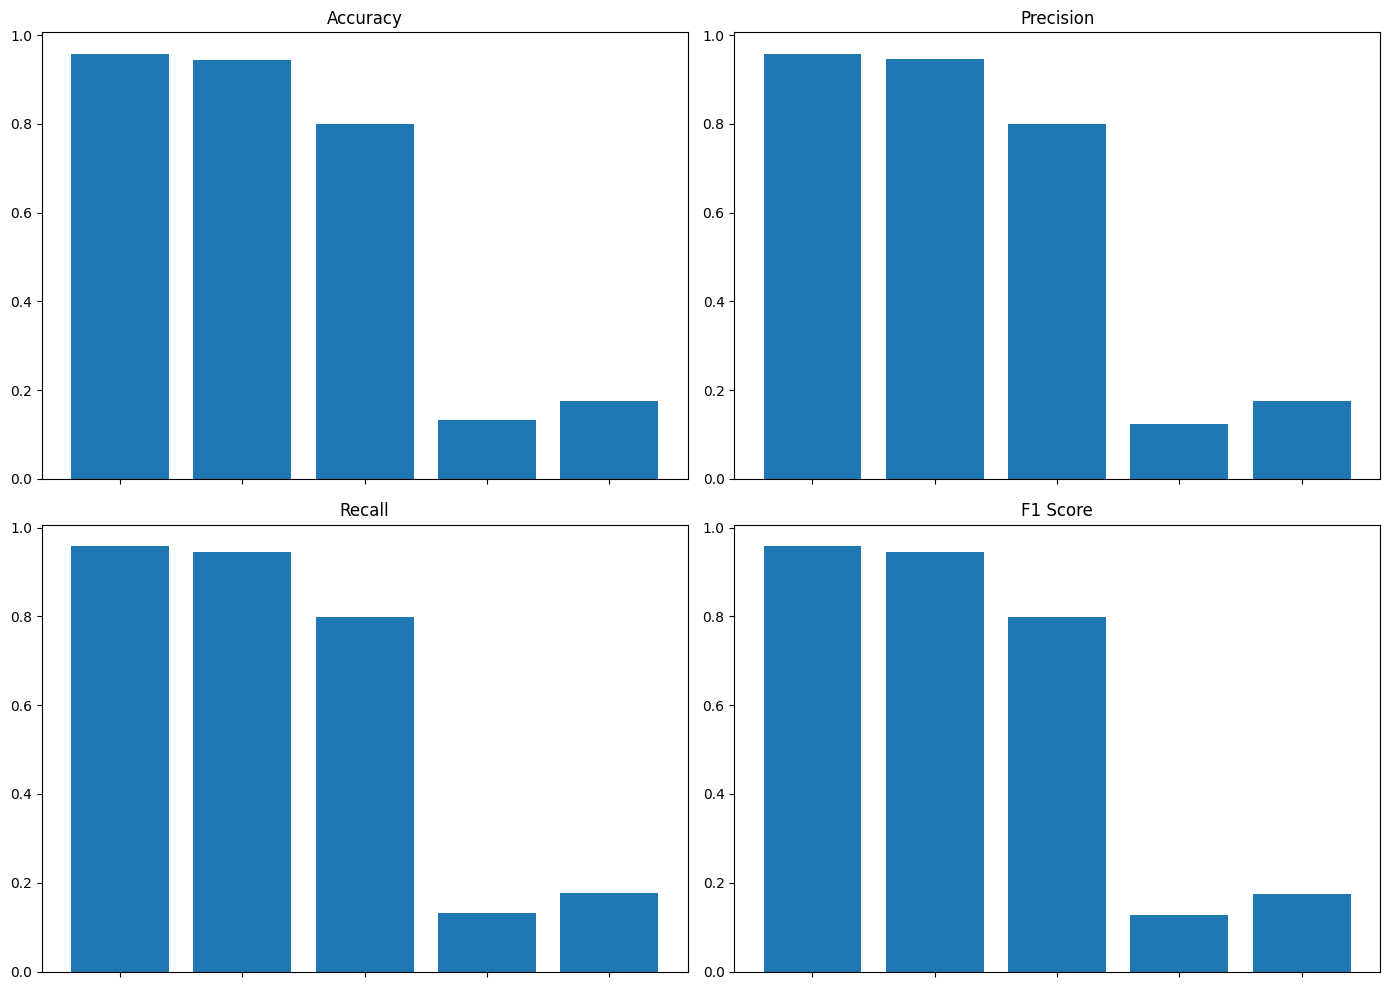

In [121]:
# Plotting
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].bar(accuracy.keys(), accuracy.values())
axes[0, 0].set_title('Accuracy')
axes[0, 1].bar(precision.keys(), precision.values())
axes[0, 1].set_title('Precision')
axes[1, 0].bar(recall.keys(), recall.values())
axes[1, 0].set_title('Recall')
axes[1, 1].bar(f1.keys(), f1.values())
axes[1, 1].set_title('F1 Score')

for ax in axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

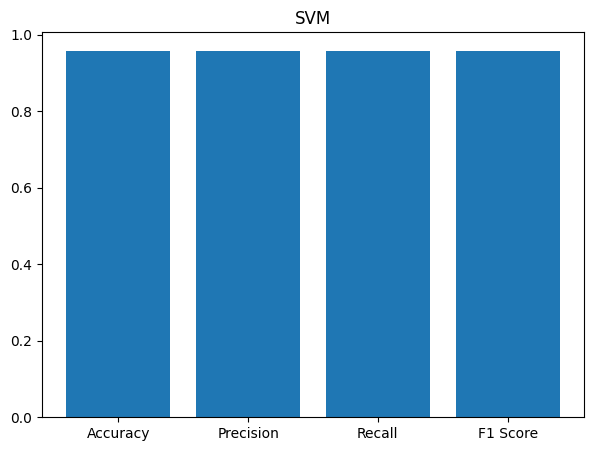

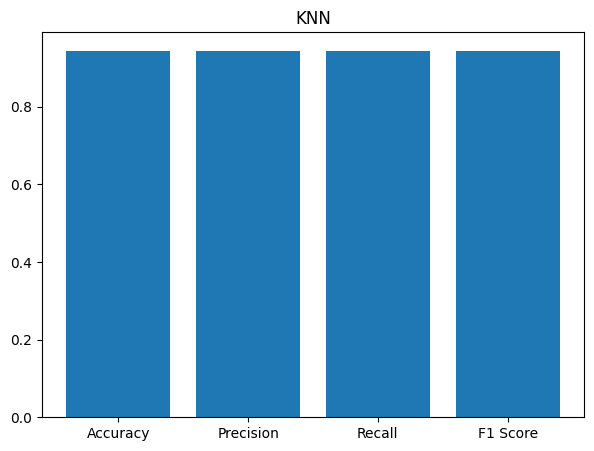

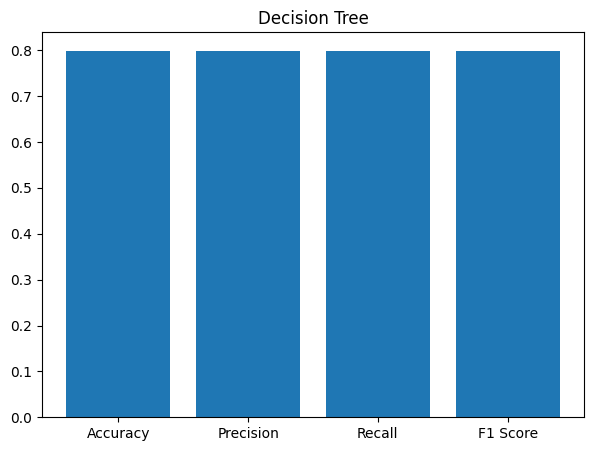

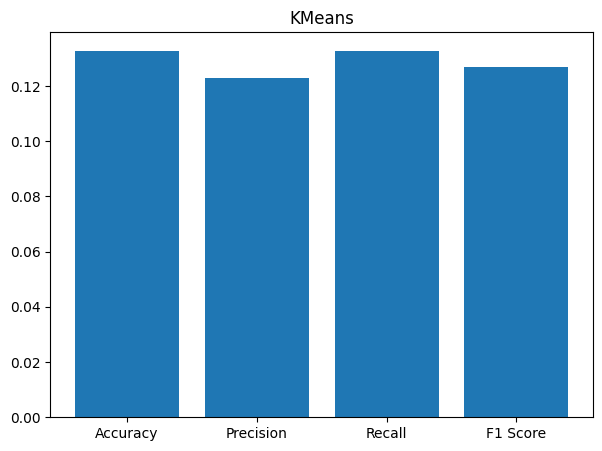

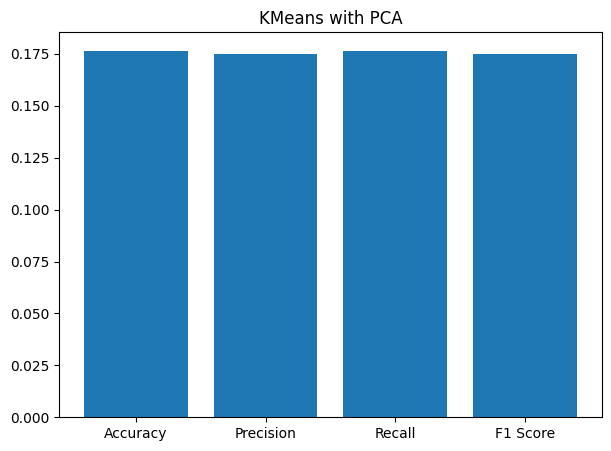

In [122]:
for name in models.keys():
    fig, axes = plt.subplots(figsize=(7, 5))
    axes.bar(["Accuracy", "Precision", "Recall", "F1 Score"], [accuracy[name], precision[name], recall[name], f1[name]])
    axes.set_title(name)
    plt.show()

In [127]:
# Collect all metrics in a list of dictionaries
metrics_table = []
for name in models.keys():
    metrics_table.append({
        "Model": name,
        "Accuracy": accuracy[name],
        "Precision": precision[name],
        "Recall": recall[name],
        "F1 Score": f1[name]
    })

In [125]:
# Print the table
print(tabulate(metrics_table, headers="keys", tablefmt="grid"))

+-----------------+------------+-------------+----------+------------+
| Model           |   Accuracy |   Precision |   Recall |   F1 Score |
+=================+============+=============+==========+============+
| SVM             |     0.9582 |    0.958166 |   0.9582 |   0.958137 |
+-----------------+------------+-------------+----------+------------+
| KNN             |     0.944  |    0.945002 |   0.944  |   0.94384  |
+-----------------+------------+-------------+----------+------------+
| Decision Tree   |     0.7991 |    0.798938 |   0.7991 |   0.798963 |
+-----------------+------------+-------------+----------+------------+
| KMeans          |     0.1328 |    0.122758 |   0.1328 |   0.126767 |
+-----------------+------------+-------------+----------+------------+
| KMeans with PCA |     0.1766 |    0.1751   |   0.1766 |   0.174886 |
+-----------------+------------+-------------+----------+------------+
